In [1]:
from config import *

In [2]:
TPU_MODE=False
SHUFFLE=False

In [4]:
import ipywidgets as widgets
import datetime
import tensorflow as tf

import dataset_functions
from models.six_stage_linear_model import ModelMaker
import callbacks
import dataset_builder
import load_weights

In [5]:
import matplotlib.pyplot as plt
import visualizations as v

<module 'visualizations' from '/home/michael_zl_prime/project_drive/project/visualizations.py'>

In [47]:
tfrecord_files_train,tfrecord_files_val=dataset_builder.get_tfrecord_filenames()
print("Found the following val TFrecords:\n","\n".join(tfrecord_files_val))

print("Building training dataset")
dst=dataset_builder.build_training_ds(tfrecord_files_train)
print("Training dataset shape:",dst)
print("Building validation dataset")
dsv=dataset_builder.build_validation_ds(tfrecord_files_val)
print("Validation dataset shape:",dsv)

Retrieving TFrecords in TPU_mode
Found the following val TFrecords:
 gs://datasets_bucket_a/validation-001.tfrecords
gs://datasets_bucket_a/validation-002.tfrecords
gs://datasets_bucket_a/validation-003.tfrecords
Building training dataset
Training dataset shape: <PrefetchDataset shapes: (((None, 368, 368, 3), (None, 46, 46, 1)), ((None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 19), (None, 46, 46, 19))), types: ((tf.float32, tf.float32), (tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32))>
Building validation dataset
Validation dataset shape: <BatchDataset shapes: (((None, 368, 368, 3), (None, 46, 46, 1)), ((None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 19), (None, 46, 46, 19))), types: ((tf.float32, tf.float32), (tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32))>


In [6]:
#model_path="gs://dl_training_results/models/Epoch18-Not_Working_On_Pafs-02Mon1219-1642"
checkpoint="gs://dl_training_results/checkpoints//08Sun1219-1300/Checkpoint-E0015.ckpt"

In [7]:
model_maker=ModelMaker() #must be outside scope to keep the graph clean
tf.keras.backend.clear_session() #to clean to backaend from the imported model

train_model,test_model=model_maker.create_models()
if (checkpoint):
    train_model.load_weights(checkpoint)

In [8]:
model_path=MODELS_PATH+datetime.datetime.now().strftime("%d(%a)%m%y-%H%M")
tf.keras.models.save_model(train_model,model_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: gs://dl_training_results/models/08(Sun)1219-2214/assets


---
## Dataset input (truth)

In [48]:
st=next(iter(dst))
idx=0

In [133]:
idx=0

In [142]:
idx=idx+1

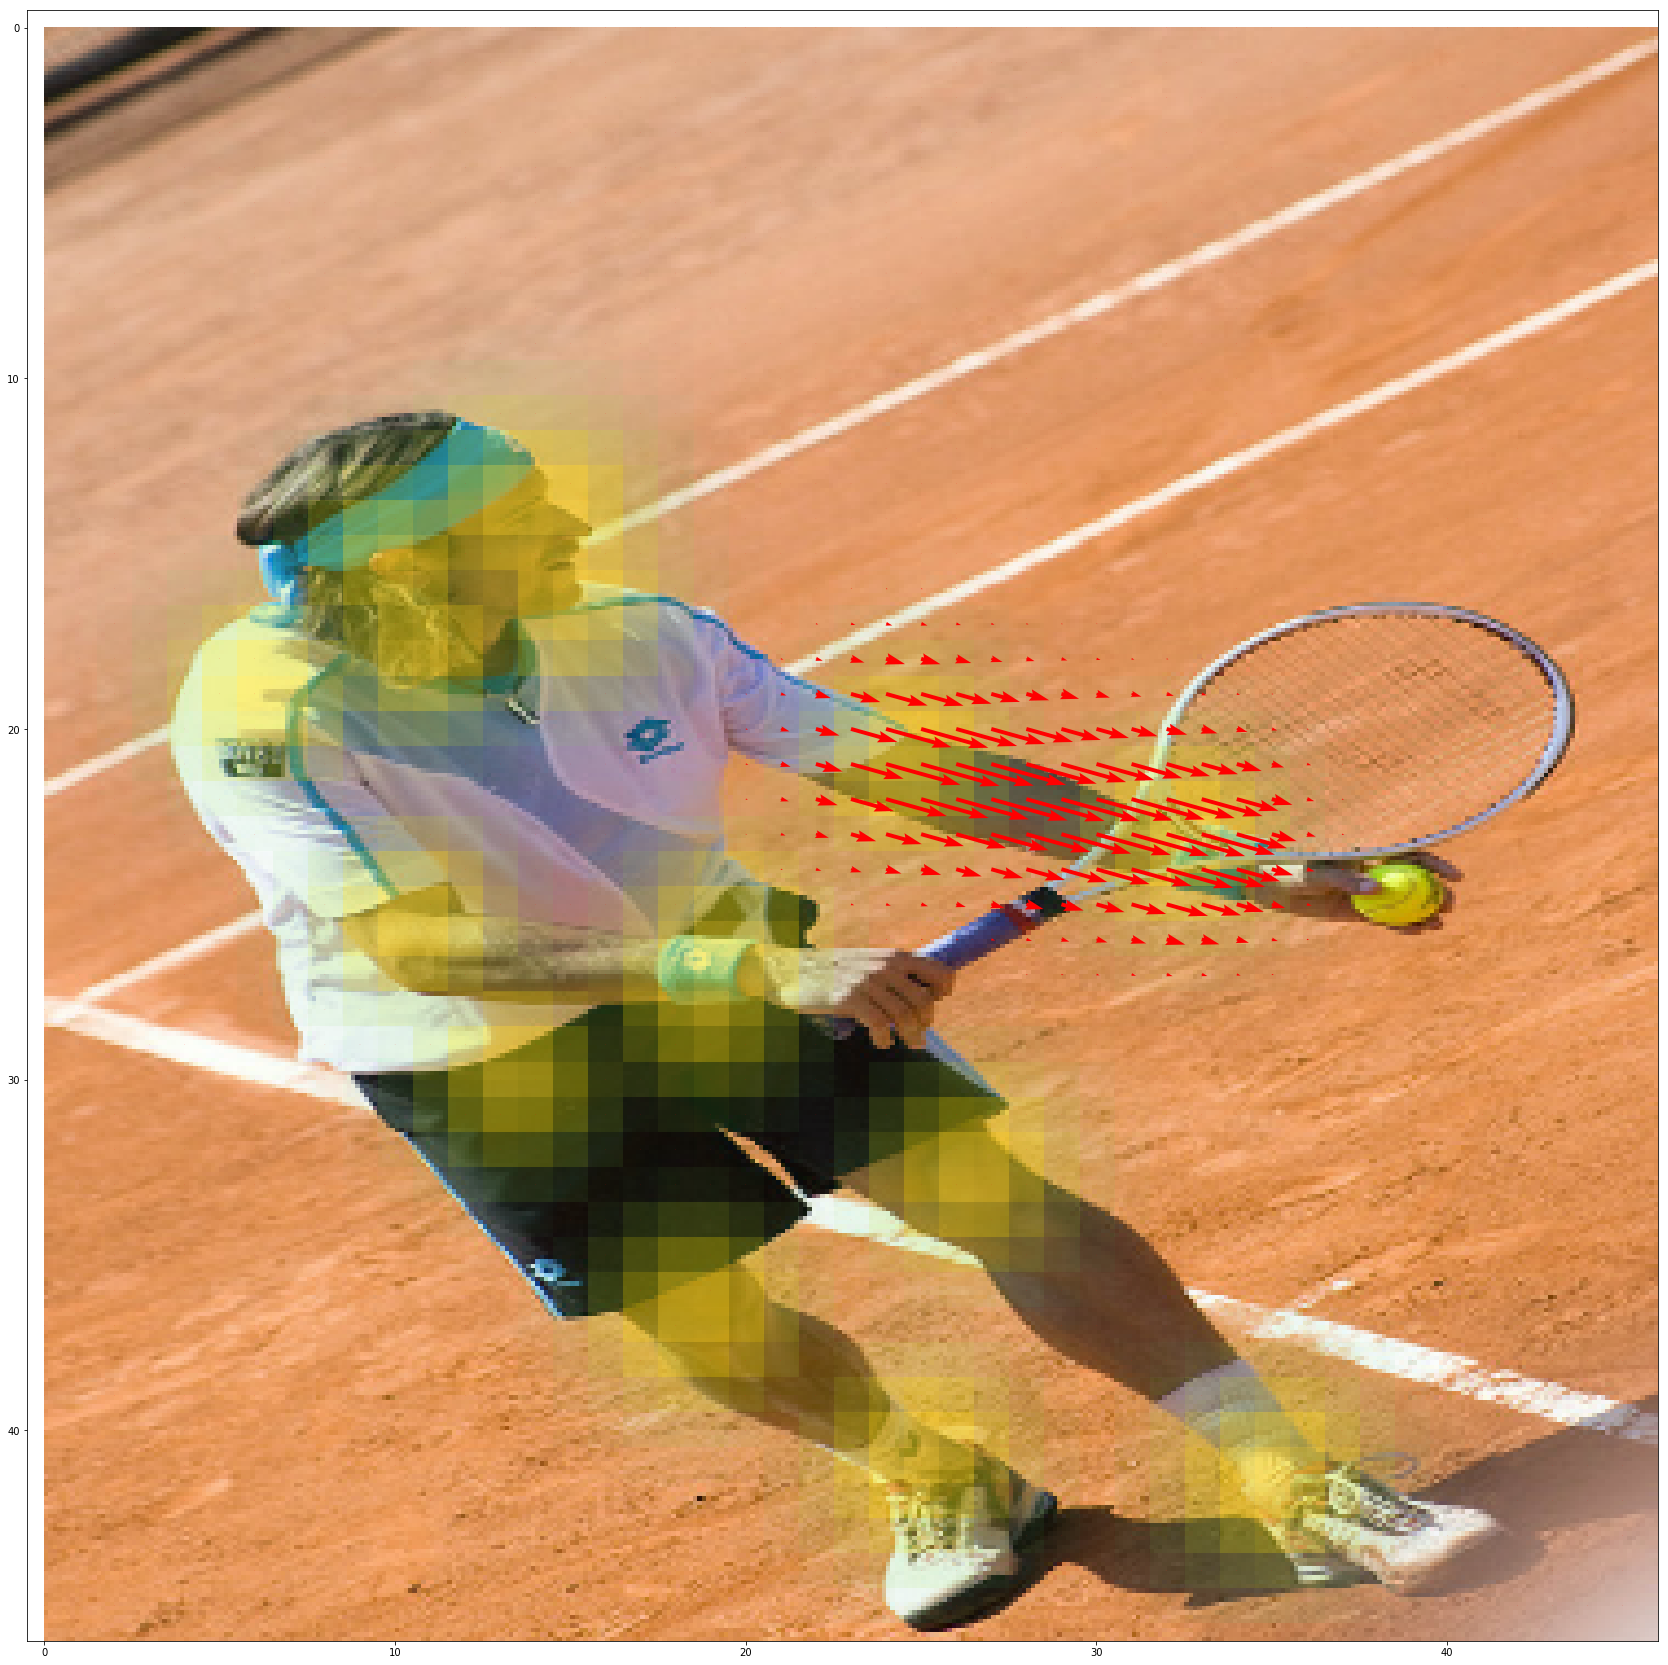

In [183]:
#Display an input element
img=st[0][0][idx:idx+1].numpy()
paf=st[1][3][idx:idx+1].numpy()
kpt=st[1][5][idx:idx+1].numpy()
mask=paf[...,-1]
paf=paf[...,:-1] #remove mask
kpt=kpt[...,:-1] #remove mask
#input_patch=st[0][idx:idx+1]
s=6
paf=np.stack([paf[...,s],paf[...,s+17]],axis=-1)

v.show_img_pafs_kpts(img,paf,kpt,figure_size=30)

---
## Model prediction

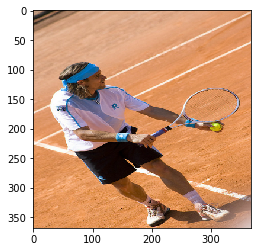

In [179]:
img_in=st[0][0][idx:idx+1].numpy()
empty_mask=np.zeros((1,46,46,1))
inputs=(img_in,empty_mask)
plt.imshow(img_in[0]) #verifiction

In [145]:
pred_t=train_model.predict(inputs) #actual prediction

In [69]:
def spread_paf_to_linear(paf):
    return np.stack([paf[...,:17],paf[...,17:]],axis=-1)
def remove_mask(inp):
    return inp[...,:-1]

In [154]:
pred_paf0=remove_mask(pred_t[0])
pred_paf2=remove_mask(pred_t[2])
pred_paf3=remove_mask(pred_t[3])
pred_kpt0=remove_mask(pred_t[4])

In [89]:
#select body part
def select_paf(input_paf,paf_idx):
    return np.stack([input_paf[...,paf_idx],input_paf[...,paf_idx+17]],axis=-1)

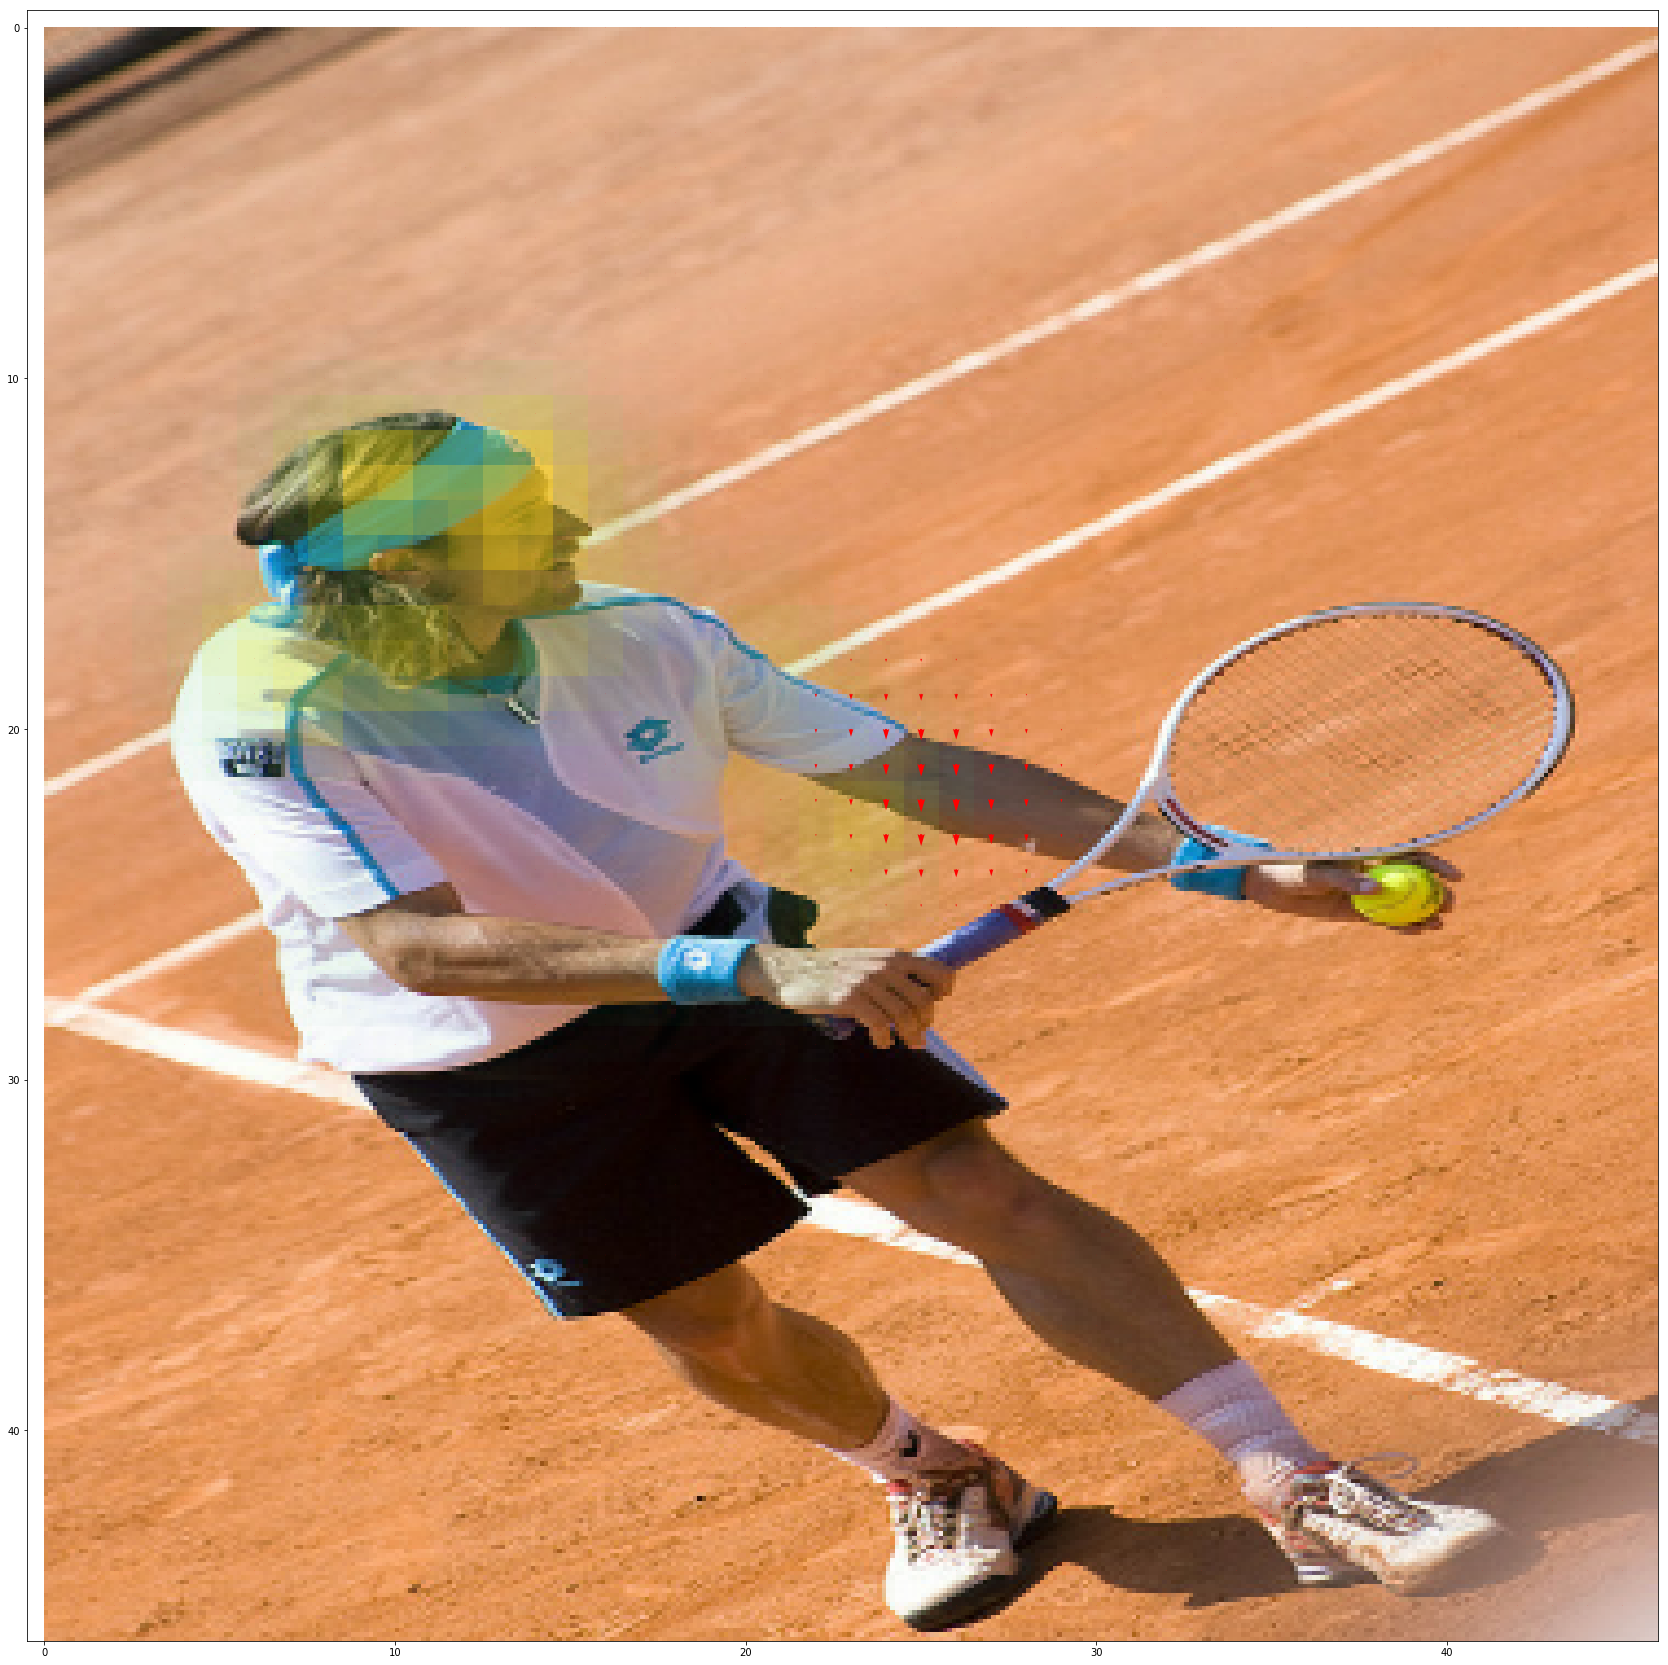

In [181]:
pred_paf=pred_paf2
pred_paf=select_paf(pred_paf,6)
v.show_img_pafs_kpts(img_in,pred_paf,pred_kpt0,figure_size=30)

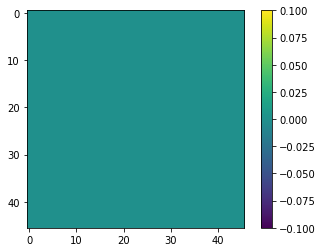

In [148]:
plt.imshow(pred_paf2[0,...,0+17])
plt.colorbar()